In [66]:
using DifferentialEquations, Plots

In [99]:
# Defining ODE problem
function f(du,u,p,t)

    # State variables
    T, h, v = u

    # Outside Parameters
    α = p

    # Parameters
    R = 8.314  # J/(mol·K)
    Cᵥ = (5/2)*R  # J/(mol·K)
    η₀ = 1.81e3  # Pa·s
    A = 1e-4  # m²
    m = 0.255 # kg
    g = 9.81 # m/s²
    pᵤ = 1e5 # Pa
    pᵢ = 1.25e5 # Pa
    Tᵢ = 300 # K
    hᵢ = 0.2 # m
    F₀ = 12.5 # N

    # Algebraic Equations
    N = pᵢ*A*hᵢ/(R*Tᵢ)
    pr = N*R*T/(A*h)
    ηₗ = (4/3)*η₀*(T/300)^α
    pzz = pr - ηₗ*v/h

    # Differential Equations
    du[1] = -A*v*(pr - ηₗ*v/h)/(N*Cᵥ)
    du[2] = v
    du[3] = -(F₀/m) - g - (A/m)*(pᵤ - pzz)
    
    return nothing
end

# Initial conditions and problem setup
u0 = [300.0, 0.2, 0.0]
tspan = (0.0, 2.5)
p1 = 0.0
p2 = 0.8

# Define ODE problems
prob1 = ODEProblem(f,u0,tspan, p1)
prob2 = ODEProblem(f,u0,tspan, p2)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 2.5)
u0: 3-element Vector{Float64}:
 300.0
   0.2
   0.0

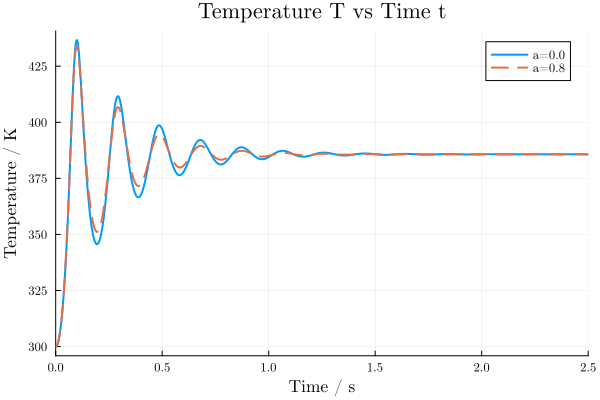

In [100]:
# Solving ODE problem
sol1 = solve(prob1, Rodas5P(), callback=cb1, reltol=1e-8, abstol=1e-8)
sol2 = solve(prob2, Rodas5P(), callback=cb2, reltol=1e-8, abstol=1e-8)

# T(t) Plot
plot( title="Temperature T vs Time t", xlims=(0,2.5), fontfamily="Computer Modern")
plot!(sol1.t, sol1[1, :], xlabel="Time / s", ylabel="Temperature / K", label="a=0.0", lw=2)
plot!(sol2.t, sol2[1, :], label="a=0.8", lw=2, ls=:dash)

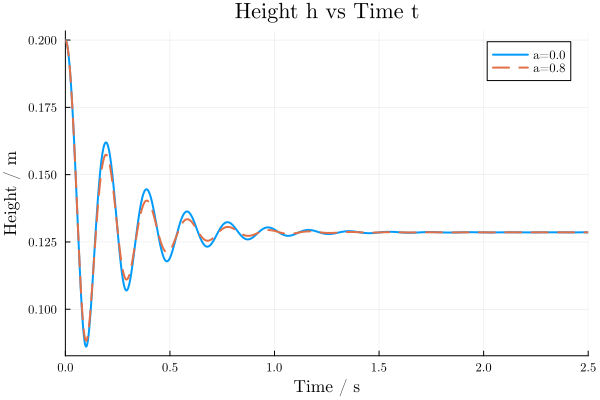

In [101]:
# h(t) Plot
plot(title="Height h vs Time t", xlims=(0,2.5), fontfamily="Computer Modern")
plot!(sol1.t, sol1[2, :], xlabel="Time / s", ylabel="Height / m", label="a=0.0", lw=2)
plot!(sol2.t, sol2[2, :], label="a=0.8", lw=2, ls=:dash)

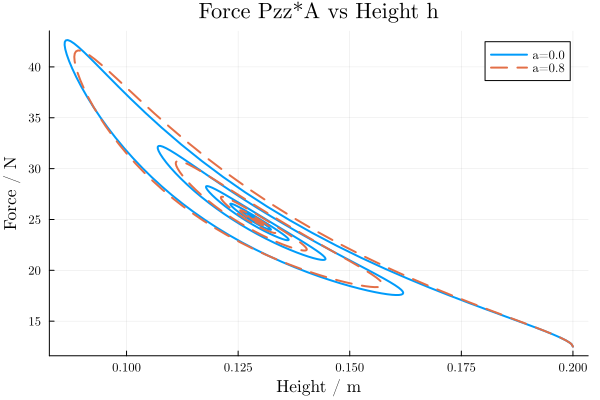

In [102]:
# Parameters for Fzz(h) calculation
pᵢ = 1.25e5
Tᵢ = 300
hᵢ = 0.2
η₀ = 1.81e3
A = 1e-4

# Fzz(h) calculation
T1 = sol1[1, :]
h1 = sol1[2, :]
v1 = sol1[3, :]
pzz1 = (pᵢ*hᵢ/Tᵢ).*(T1./h1) - (4/3)*η₀*(T1/300).^(p1).*(v1./h1)
Fzz1 = pzz1*A

T2 = sol2[1, :]
h2 = sol2[2, :]
v2 = sol2[3, :]
pzz2 = (pᵢ*hᵢ/Tᵢ).*(T2./h2) - (4/3)*η₀*(T2/300).^(p2).*(v2./h2)
Fzz2 = pzz2*A

# Fzz(h) Plot
plot(title="Force Pzz*A vs Height h", fontfamily="Computer Modern")
plot!(h1, Fzz1, xlabel="Height / m", ylabel="Force / N", label="a=0.0", lw=2)
plot!(h2, Fzz2, label="a=0.8", lw=2, ls=:dash)